In [1]:
import numpy as np # for array manipulations and calculations
import cv2 # for preprocessing of images
 
import matplotlib.pyplot as plt # to show the image

from sklearn.model_selection import train_test_split # train test split for images

from sklearn import svm # SVM model

import joblib # To save the model

# for accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Read the labels

In [2]:
# Labels

Y = []

with open('./output.txt', "r") as file:
    for line in file:
        # Process the current line
        Y.append(line.strip())

In [3]:
len(Y)

8000

In [4]:
print(Y[0])

2


# Read the images

The images are read and preprocecssed. 

# Preprocessing

Initially to find the background color, the corners are tested.

Then those pixels are masked and removed.

The erode function is used to erode the background lines in the image.

Then the numbers in the image are identified with contour plotting, separated,  normalized and flattened (converted to 1D array).

In [5]:
def preProcImg(img):

    flag = True
    
    l,w, _ = img.shape
    corners = [img[0,0].tolist(),img[0,w-1].tolist(),img[l-1,w-1].tolist(),img[l-1,0].tolist()]
    corners = [tuple(c) for c in corners]

    bg = max(set(corners), key=corners.count)

    mask = np.logical_not(np.all(img==bg,-1))

    kernel = np.ones((5, 5), np.uint8)

    mask = cv2.erode(mask.astype(np.uint8), kernel)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    dummy = sorted(contours, key=cv2.contourArea, reverse=True)

    dummy = dummy[:4]

    dummy = sorted(dummy, key=lambda dummy: cv2.boundingRect(dummy)[0])

    ret  = []

    for c in dummy:
        
        left = max(np.amin(c[:,:,0]).item()-20, 0)
        right = min(np.amax(c[:,:,0]).item()+20, w)
        retImg = np.clip(mask[:,left:right].astype(np.float32)*255, 0,255)
        retImg = cv2.resize(retImg.astype(np.uint8),(32,32))
        retImg = cv2.normalize(retImg, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        # to view the images, display retImg from here
        
        if flag:
            plt.imshow(retImg)
            flag = False
            
        retImg = retImg.flatten()
        ret.append(retImg)
        

    return ret

In [6]:
def getImgs():
    X = []
    ret = []
    for i in range(2000):
        img = cv2.imread(f'./train/{i}.png')
        X = preProcImg(img)
        
        ret.extend(X)
            
    return ret
  

An example for the processed image before flattening is displayed down

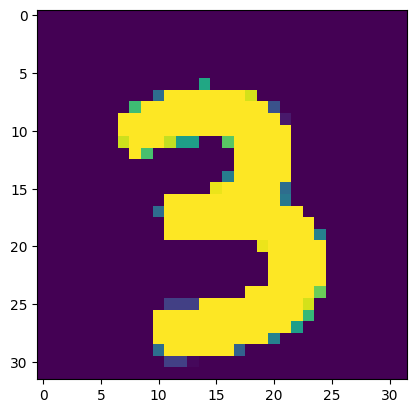

In [7]:
X = getImgs()

In [9]:
print(len(X))
print(X[0].shape)

8000
(1024,)


In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 22)

In [11]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

# Training

SVM from scikit library is used

In [12]:
def train(xtrain, ytrain):

    model = svm.SVC()

    model.fit(xtrain, ytrain)

    joblib.dump(model, './model.joblib')    

    return model 

In [13]:
model = train(xtrain, ytrain)

In [14]:
ypred = model.predict(xtest)

# Accuracy achieved - 99.93 %

In [15]:
accuracy_score(ytest, ypred)

0.999375

In [16]:
confusion_matrix(ytest, ypred)

array([[ 64,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0, 105,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,  93,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0, 112,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  83,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 120,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  99,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 125,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   